In [2]:
# Importing libraries that will be used in this Notebook.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import skimage 

from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
images = np.load("/kaggle/input/sign-language-digits-dataset/X.npy")
testImgs = np.load("/kaggle/input/sign-language-digits-dataset/Y.npy")

In [4]:
images.shape

(2062, 64, 64)

In [5]:
testImgs[1000]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

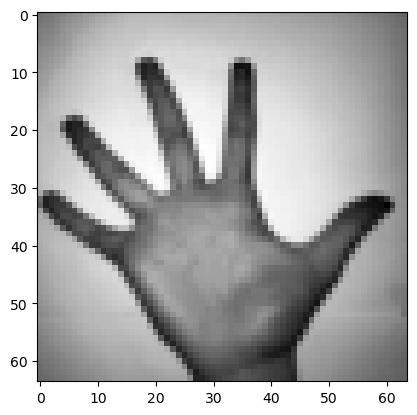

In [6]:
plt.imshow(images[2000],cmap='gray')
plt.show()

In [7]:
images[2000].shape

(64, 64)

In [8]:
np.min(images[0])

0.19215687

Normalizing iamges

In [9]:
nromImgs=[]
for i in range(len(images)):
    norm = (images[i] - np.min(images[i])) / (np.max(images[i]) - np.min(images[i]))
    nromImgs.append(norm)

In [10]:
len(nromImgs)

2062

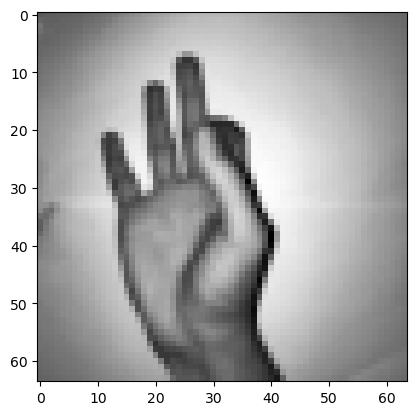

In [11]:
plt.imshow(nromImgs[0],cmap='gray')

In [12]:
nromImgs = np.array(nromImgs)
nromImgs[0]

array([[0.35353532, 0.36363634, 0.36868685, ..., 0.41919196, 0.41414145,
        0.39898995],
       [0.39393938, 0.37878785, 0.37878785, ..., 0.42929298, 0.41919196,
        0.40909097],
       [0.4545455 , 0.38888887, 0.38383836, ..., 0.4343435 , 0.42929298,
        0.41414145],
       ...,
       [0.39898995, 0.41414145, 0.41919196, ..., 0.46464652, 0.4545455 ,
        0.439394  ],
       [0.39393938, 0.40404046, 0.41414145, ..., 0.4545455 , 0.439394  ,
        0.42424247],
       [0.38383836, 0.39393938, 0.39898995, ..., 0.4343435 , 0.42424247,
        0.40909097]], dtype=float32)

In [13]:
nromImgs.shape

(2062, 64, 64)

In [14]:
X_normImgs = nromImgs.reshape(-1,64,64,1)
print("X_normImgs shape",X_normImgs.shape)

X_normImgs shape (2062, 64, 64, 1)


In [15]:
X_classification = np.concatenate((X_normImgs[204:409,:],
                                   X_normImgs[822:1028,:],
                                   X_normImgs[1649:1855,:],
                                   X_normImgs[1443:1649,:],
                                   X_normImgs[1236:1443,:],
                                   X_normImgs[1855:2062,:],
                                   X_normImgs[615:822,:],
                                   X_normImgs[409:615,:],
                                   X_normImgs[1028:1236,:],
                                   X_normImgs[0:204,:]),axis = 0)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X_classification,testImgs,test_size = 0.1, random_state = 42)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (1855, 64, 64, 1)
x_test shape (207, 64, 64, 1)
y_train shape (1855, 10)
y_test shape (207, 10)


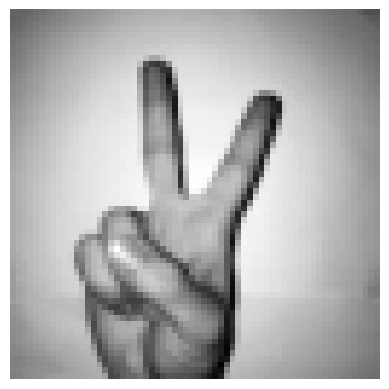

In [17]:
plt.imshow(x_train[5],cmap='gray')
plt.axis("off")
plt.show()

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [19]:
def createModel():
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu',input_shape=(64,64,1)))
    model.add(Conv2D(32 , (3,3) , activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64 , (3,3) , padding='same', activation='relu' ))
    model.add(Conv2D(64 , (3,3) , activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64 , (3,3) , padding='same', activation='relu' ))
    model.add(Conv2D(64 , (3,3) , activation='relu' ))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax'))
    
    return model

In [20]:
model1 = createModel()

In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [23]:
batch_size=256
epochs = 35

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy' ,  metrics=['accuracy'])
model1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,
           validation_data=(x_test,y_test))

Epoch 1/35


2023-08-15 13:13:14.000533: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - 3s 114ms/step - loss: 0.1514 - accuracy: 0.9493 - val_loss: 0.1174 - val_accuracy: 0.9710
Epoch 2/35
8/8 [==============================] - 1s 75ms/step - loss: 0.0314 - accuracy: 0.9892 - val_loss: 0.1026 - val_accuracy: 0.9758
Epoch 3/35
8/8 [==============================] - 1s 75ms/step - loss: 0.0397 - accuracy: 0.9854 - val_loss: 0.1000 - val_accuracy: 0.9710
Epoch 4/35
8/8 [==============================] - 1s 75ms/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 0.1102 - val_accuracy: 0.9758
Epoch 5/35
8/8 [==============================] - 1s 75ms/step - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.1013 - val_accuracy: 0.9855
Epoch 6/35
8/8 [==============================] - 1s 75ms/step - loss: 0.0468 - accuracy: 0.9876 - val_loss: 0.0806 - val_accuracy: 0.9710
Epoch 7/35
8/8 [==============================] - 1s 75ms/step - loss: 0.0283 - accuracy: 0.9919 - val_loss: 0.1433 - val_accuracy: 0.9662
Epoch 8/35
8/8 [=====================

In [24]:
model1.evaluate(x_test,y_test)

7/7 [==============================] - 1s 32ms/step - loss: 0.1276 - accuracy: 0.9855


[0.12755979597568512, 0.9855072498321533]

7/7 [==============================] - 0s 3ms/step


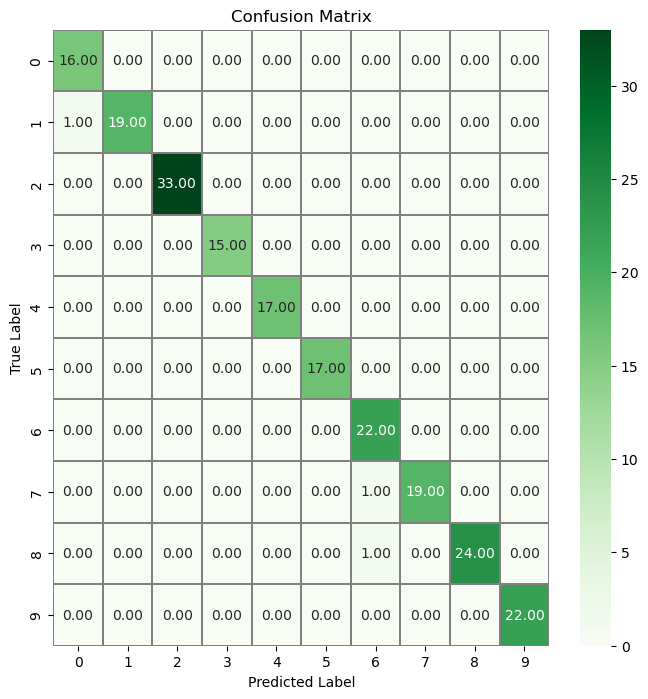

In [25]:
Y_pred = model1.predict(x_test)
# Convert Predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert Validation observation to one hot vectors
Y_true = np.argmax(y_test, axis = 1)

condision_mtrx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(condision_mtrx, annot = True, linewidths = 0.01, cmap = "Greens", linecolor = "gray", fmt = ".2f", ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

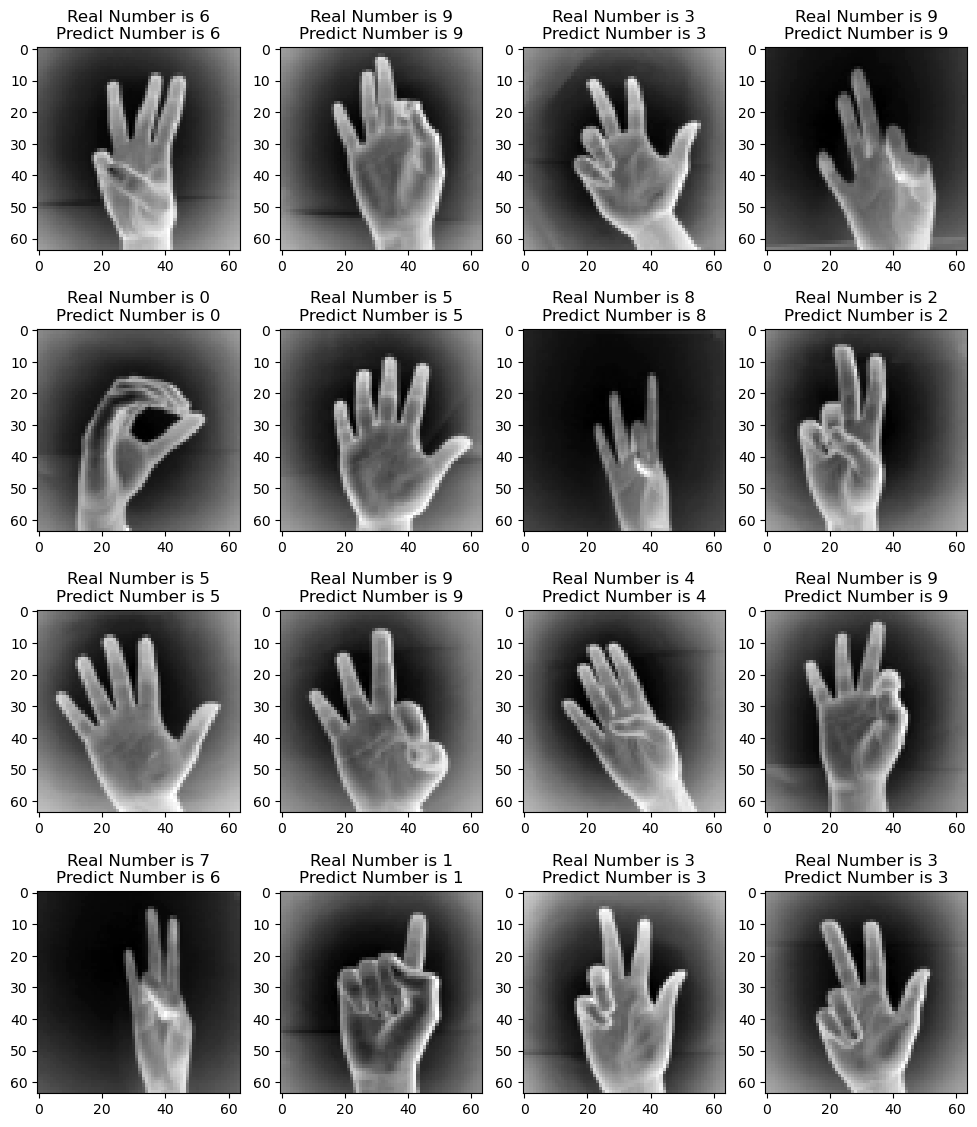

In [26]:
x_val_test =  x_test.reshape(x_test.shape[0], 64, 64)

fig , axis = plt.subplots(4, 4, figsize = (12, 14))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_val_test[i], cmap = 'binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {Y_pred[i].argmax()}");

7/7 [==============================] - 0s 4ms/step


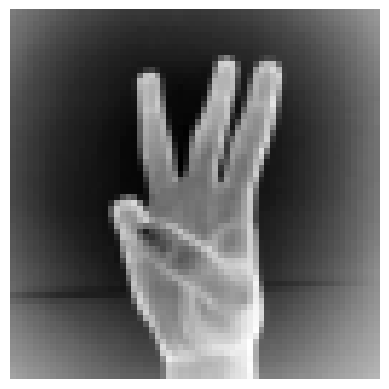

Previsto : [6 9 3 9 0 5 8 2 5 9 4 9 6 1 3 3 0 5 0 7 0 8 3 6 9 2 7 3 5 9 8 5 4 6 4 6 3
 1 9 2 7 7 3 1 1 2 0 7 8 9 1 9 6 2 0 0 6 6 2 8 8 7 2 7 5 9 2 3 6 4 1 1 5 7
 4 9 9 4 3 8 8 9 2 0 9 0 0 4 1 5 5 4 7 4 7 4 2 2 8 7 2 0 9 0 2 1 7 8 8 7 2
 8 3 3 2 2 6 1 5 5 5 0 1 5 8 2 6 5 1 0 3 1 9 9 8 3 8 9 2 2 2 6 2 6 6 1 6 2
 5 4 9 2 1 2 6 2 6 6 1 1 7 5 9 8 6 2 4 7 6 9 8 7 2 9 1 6 7 6 0 6 1 7 4 8 4
 3 2 2 4 2 8 6 8 3 2 0 8 8 8 5 4 7 0 8 2 4 2]
   ImageId  Label
0        1      6
1        2      9
2        3      3
3        4      9
4        5      0
5        6      5
6        7      8
7        8      2
8        9      5
9       10      9


In [27]:
y_pred_test = model1.predict(x_test)
y_pred_test = np.argmax(y_pred_test,axis=1)

i = 0
plt.imshow(x_test[i].reshape(64,64), cmap = plt.cm.binary)
plt.axis("off")
plt.show()
print('Previsto : {}'.format(y_pred_test))

result = pd.Series(y_pred_test, name = "Label")
submission = pd.concat([pd.Series(range(1, len(y_pred_test)+1), name = "ImageId"), result], axis = 1)
print(submission.head(10))
submission.to_csv("sign_recognetion.csv", index = False)

# Thank You